In [1]:
import pandas as pd
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv("C:/Users/user/Desktop/DMX/Datasets/SUV_Predictions.csv")
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Analyzing Data

<Axes: xlabel='Purchased', ylabel='count'>

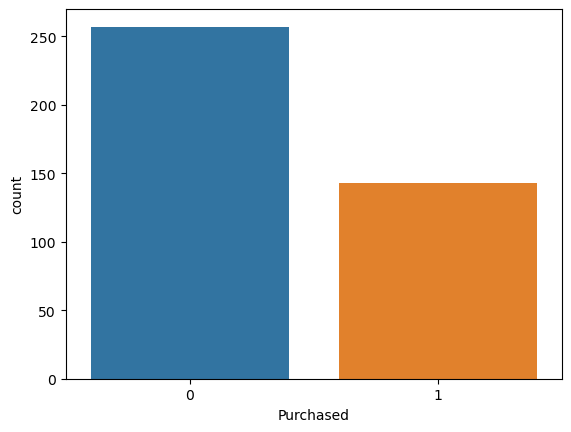

In [3]:
sns.countplot(x = 'Purchased', data = df)

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

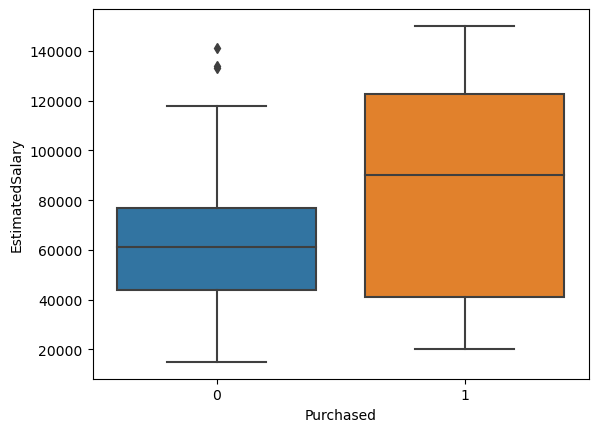

In [4]:
sns.boxplot(x = 'Purchased', y = 'EstimatedSalary', data = df)

<Axes: ylabel='Frequency'>

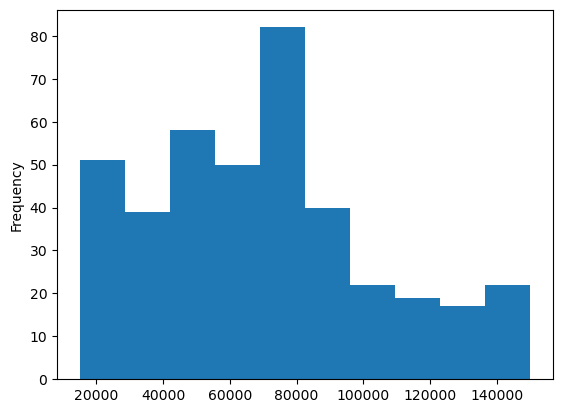

In [5]:
df['EstimatedSalary'].plot.hist()

<Axes: xlabel='Purchased', ylabel='count'>

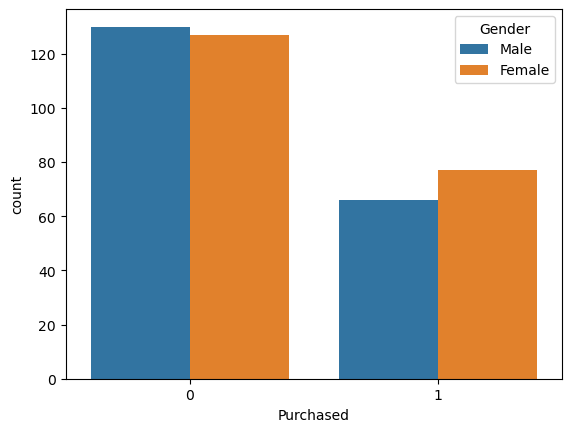

In [6]:
sns.countplot(x = 'Purchased', hue = 'Gender', data = df)

<Axes: xlabel='Purchased', ylabel='Age'>

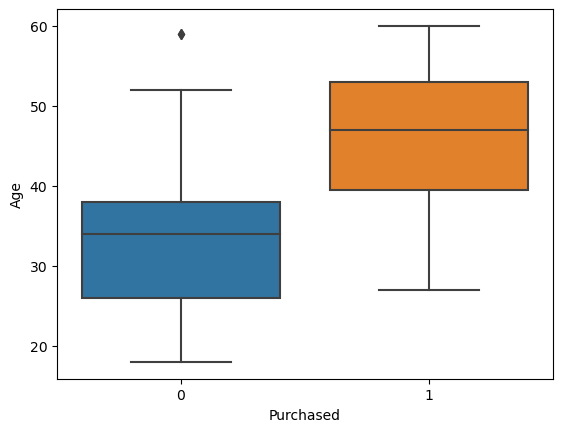

In [7]:
sns.boxplot(x = 'Purchased', y = 'Age', data = df)

# Data Wrangling

In [8]:
gender = pd.get_dummies(df['Gender'], drop_first = True)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [9]:
purchased = pd.get_dummies(df['Purchased'], drop_first = True)
purchased

,1
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [10]:
df = pd.concat([df,gender,purchased], axis = 1)
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male,1
0,15624510,Male,19,19000,0,1,0
1,15810944,Male,35,20000,0,1,0
2,15668575,Female,26,43000,0,0,0
3,15603246,Female,27,57000,0,0,0
4,15804002,Male,19,76000,0,1,0
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0,1
396,15706071,Male,51,23000,1,1,1
397,15654296,Female,50,20000,1,0,1
398,15755018,Male,36,33000,0,1,0


In [11]:
df = df.drop(df.columns[0:1],1)

df

C:\Users\user\AppData\Local\Temp\ipykernel_10196\1617777485.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df.columns[0:1],1)


,Gender,Age,EstimatedSalary,Purchased,Male,1
0,Male,19,19000,0,1,0
1,Male,35,20000,0,1,0
2,Female,26,43000,0,0,0
3,Female,27,57000,0,0,0
4,Male,19,76000,0,1,0
...,...,...,...,...,...,...
395,Female,46,41000,1,0,1
396,Male,51,23000,1,1,1
397,Female,50,20000,1,0,1
398,Male,36,33000,0,1,0


In [12]:
df = df.drop(df.columns[0:1],1)
df

C:\Users\user\AppData\Local\Temp\ipykernel_10196\1956387305.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df.columns[0:1],1)


,Age,EstimatedSalary,Purchased,Male,1
0,19,19000,0,1,0
1,35,20000,0,1,0
2,26,43000,0,0,0
3,27,57000,0,0,0
4,19,76000,0,1,0
...,...,...,...,...,...
395,46,41000,1,0,1
396,51,23000,1,1,1
397,50,20000,1,0,1
398,36,33000,0,1,0


In [13]:
df = df.drop(df.columns[2:3],1)
df

C:\Users\user\AppData\Local\Temp\ipykernel_10196\3198257768.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df.columns[2:3],1)


,Age,EstimatedSalary,Male,1
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


In [14]:
df.columns.astype(str)
df

,Age,EstimatedSalary,Male,1
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


In [15]:
df1 = df.rename(columns = {'Male':'Gender', 1:'Purchased'})
df1

,Age,EstimatedSalary,Gender,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


<Axes: >

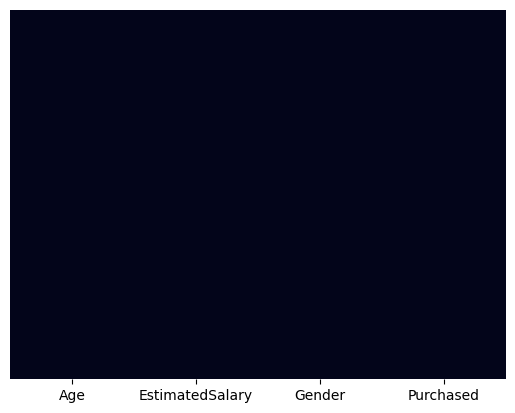

In [16]:
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False)

# Train Data

In [17]:
X = df1.drop('Purchased', axis = 1)

y = df1['Purchased']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)# random state ensures the same result

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()                   #Scale the input values for better performance esp for large dataset  

X_train = sc.fit_transform(X_train) 

X_test = sc.transform(X_test)

In [22]:
#Building the model

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 250)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [23]:
#Evaluating the model

from sklearn.metrics import classification_report

In [24]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.96      0.93        68\n           1       0.89      0.78      0.83        32\n\n    accuracy                           0.90       100\n   macro avg       0.90      0.87      0.88       100\nweighted avg       0.90      0.90      0.90       100\n'

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_test, y_pred) #the model predicted that 65 people did not purchase and in reality 65 people did not purchase
                                 #the model predicted that 25 people purchased and actually 25 people did purchase SUV   

array([[65,  3],
       [ 7, 25]], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred) *100 # The accuracy of the model is 90 %, which is high 

90.0